In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to perform linear regression
def linear_regression_model(csv_file, target_column, scale=False):
    
    # Load the CSV file
    df = pd.read_csv(csv_file, sep=',')
    
    # Separate the predictor variables (X) and the target variable (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Normalization (if needed)
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the linear regression model
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = reg_model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Visualize the predictions vs real values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Linear Regression: Predictions vs Actual Values')
    plt.show()
    
    # Return the evaluation metrics
    metrics = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    }
    
    return metrics


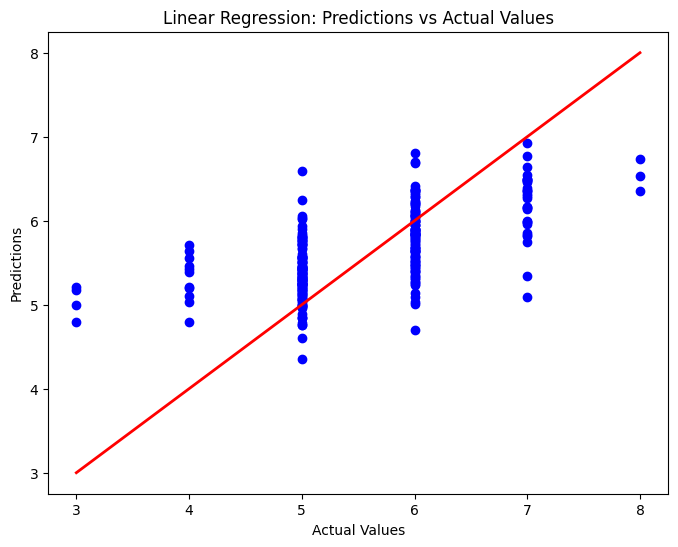

{'MAE': 0.5041409053480713, 'RMSE': np.float64(0.656512760797608), 'R²': 0.3915360499058189}


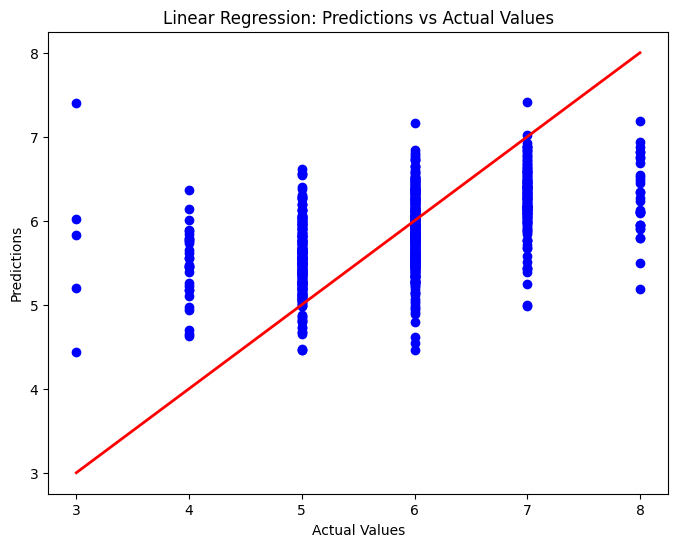

{'MAE': 0.5973645217257016, 'RMSE': np.float64(0.7791867276495386), 'R²': 0.2597097667382343}


In [4]:
metrics = linear_regression_model("../cleanDatasets/winequality-red_cleaned.csv", target_column="quality", scale=True)
print(metrics)

metrics = linear_regression_model("../cleanDatasets/winequality-white_cleaned.csv", target_column="quality", scale=True)
print(metrics)